# Objective
To determine sentimental behaviour of people towards 'work from home' by analyzing tweets(#wfh). 

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Resources
1. https://github.com/debnsuma/Intro-Transformer-BERT/blob/main/BERT-Disaster-Tweets-Prediction.ipynb
2. https://github.com/Rohan2002/BERT-natural-disaster-tweet-prediction/tree/master/lib
3. https://python.plainenglish.io/scraping-tweets-using-snscrape-and-building-sentiment-classifier-13811dadd11d

In [2]:
df = pd.read_csv('tweets.csv') #loading data

In [3]:
pd.set_option('display.max_colwidth', None) #display coumn width to maximum to read complete tweets

In [4]:
df.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags'],
      dtype='object')

The raw data has 27 column. However I need only 'date', 'content' and 'hastags' columns.

In [5]:
df.head(2)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/powertectelecom/status/1423522770596417536,2021-08-06 05:54:10+00:00,Powertec is here to help guide and advise you on recommended Wi-Fi connectivity solutions for students studying at home. https://t.co/Aj6tmMJ44V\n\n#workingfromhome #WFH #homeoffice #homeschooling #COVID #lockdown2021 #studyfromhome #homeschooling https://t.co/g2NAmG7YmG,Powertec is here to help guide and advise you on recommended Wi-Fi connectivity solutions for students studying at home. t.ly/1LL4\n\n#workingfromhome #WFH #homeoffice #homeschooling #COVID #lockdown2021 #studyfromhome #homeschooling https://t.co/g2NAmG7YmG,1423522770596417536,"{'username': 'powertectelecom', 'id': 160805245, 'displayname': 'Powertec Wireless Technology', 'description': 'Your connectivity experts, pioneering in the field of carrier grade commercial communications products and solutions.', 'rawDescription': 'Your connectivity experts, pioneering in the field of carrier grade commercial communications products and solutions.', 'descriptionUrls': None, 'verified': False, 'created': datetime.datetime(2010, 6, 29, 4, 55, 4, tzinfo=datetime.timezone.utc), 'followersCount': 85, 'friendsCount': 204, 'statusesCount': 1078, 'favouritesCount': 156, 'listedCount': 1, 'mediaCount': 391, 'location': 'Gold Coast, Australia', 'protected': False, 'linkUrl': 'http://www.powertec.com.au', 'linkTcourl': 'http://t.co/Z8waMsS46R', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1379964506793672705/gsE59wTC_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/160805245/1625463287'}",0,0,0,0,...,"[{'previewUrl': 'https://pbs.twimg.com/media/E8FePRnVcAEH-Mb?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/E8FePRnVcAEH-Mb?format=jpg&name=large'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']",NaN
1,https://twitter.com/htcity/status/1423520079602327552,2021-08-06 05:43:29+00:00,".@SidMalhotra keeps it casual while working from home writes, “No thanks, Formals.” \n\n#SidharthMalhotra #Casual #Bollywood #WFH https://t.co/V7R6EcpDQd",".@SidMalhotra keeps it casual while working from home writes, “No thanks, Formals.” \n\n#SidharthMalhotra #Casual #Bollywood #WFH https://t.co/V7R6EcpDQd",1423520079602327552,"{'username': 'htcity', 'id': 125582800, 'displayname': 'HT City', 'description': 'The lifestyle and entertainment supplement, everyday with Hindustan Times.', 'rawDescription': 'The lifestyle and entertainment supplement, everyday with Hindustan Times.', 'descriptionUrls': None, 'verified': True, 'created': datetime.datetime(2010, 3, 23, 7, 14, 2, tzinfo=datetime.timezone.utc), 'followersCount': 46755, 'friendsCount': 722, 'statusesCount': 25319, 'favouritesCount': 4108, 'listedCount': 184, 'mediaCount': 12984, 'location': 'New Delhi', 'protected': False, 'linkUrl': 'http://www.facebook.com/htcity', 'linkTcourl': 'http://t.co/d6B1GEhNFe', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1302181147212881921/pm0LewaR_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/125582800/1599295789'}",0,1,1,0,...,"[{'previewUrl': 'https://pbs.twimg.com/media/E8Fb9b7VcAAqj5j?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/E8Fb9b7VcAAqj5j?format=jpg&name=large'}, {'previewUrl': 'https://pbs.twimg.com/media/E8Fb9b7UcAAnLM8?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/E8Fb9b7UcAAnLM8?format=jpg&name=large'}]",NaN,NaN,NaN,NaN,"[{'username': 'SidMalhotra', 'id': 950165300, 'displayname': 'Sidharth Malhotra', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCou

In [6]:
df1 = df[['date', 'content', 'hashtags']]

In [7]:
df1.head()

,date,content,hashtags
0,2021-08-06 05:54:10+00:00,Powertec is here to help guide and advise you on recommended Wi-Fi connectivity solutions for students studying at home. https://t.co/Aj6tmMJ44V\n\n#workingfromhome #WFH #homeoffice #homeschooling #COVID #lockdown2021 #studyfromhome #homeschooling https://t.co/g2NAmG7YmG,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']"
1,2021-08-06 05:43:29+00:00,".@SidMalhotra keeps it casual while working from home writes, “No thanks, Formals.” \n\n#SidharthMalhotra #Casual #Bollywood #WFH https://t.co/V7R6EcpDQd","['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']"
2,2021-08-06 05:43:04+00:00,Secretary team is sleeping in the job as usual #wfh https://t.co/6wnznbpCc4,['wfh']
3,2021-08-06 05:42:43+00:00,"If you work from home, it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind, if that’s possible.\n#WFH",['WFH']
4,2021-08-06 05:42:41+00:00,👩‍💻本日の会議出番ないので…\n\nマッサージガンしながら参加🤗\n\n💪(⁎⁍̴̛ᴗ⁍̴̛⁎)ﾑﾆﾑﾆ\n\n#WFH\n#マッサージガン https://t.co/m6EXgWSM9k,"['WFH', 'マッサージガン']"


In [8]:
df1.tail()

,date,content,hashtags
789347,2009-02-02 07:04:13+00:00,http://twitpic.com/1al6b - morning all. Nice and quiet outside #uksnow RH8 #wfh,"['uksnow', 'wfh']"
789348,2009-02-01 22:39:47+00:00,"Tweeple of the SE England, I think it's work from home day tomorrow. #WFH",['WFH']
789349,2009-01-29 20:25:23+00:00,Ahh. Home at last. Offspring settled. So… back to work then! #WfH,['WfH']
789350,2008-12-12 18:05:02+00:00,Stoked that @bagelradio's Best Music of 2008 broadcast is starting. Song #50 is Albert Goes West by Nick Cave. http://bagelradio.com #WFH,['WFH']
789351,2008-10-15 17:19:48+00:00,"#wfh, so nice to get work done while listening to good music and having limited distractions",['wfh']


The data is from 2008. We can analyze later if the frequency of tweets #wfh increased after the covid.

# Cleaning columns

In [9]:
df1['date'] = df1['date'].apply(lambda x: x.split(' ')[0])

In [10]:
df1['date'].dtype #data type is not in datetime format.

dtype('O')

In [11]:
df1['date'] = pd.to_datetime(df1['date'], format = "%Y-%m-%d") #conversion of date in datetime format

In [12]:
df1.head()

,date,content,hashtags
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi-Fi connectivity solutions for students studying at home. https://t.co/Aj6tmMJ44V\n\n#workingfromhome #WFH #homeoffice #homeschooling #COVID #lockdown2021 #studyfromhome #homeschooling https://t.co/g2NAmG7YmG,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']"
1,2021-08-06,".@SidMalhotra keeps it casual while working from home writes, “No thanks, Formals.” \n\n#SidharthMalhotra #Casual #Bollywood #WFH https://t.co/V7R6EcpDQd","['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']"
2,2021-08-06,Secretary team is sleeping in the job as usual #wfh https://t.co/6wnznbpCc4,['wfh']
3,2021-08-06,"If you work from home, it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind, if that’s possible.\n#WFH",['WFH']
4,2021-08-06,👩‍💻本日の会議出番ないので…\n\nマッサージガンしながら参加🤗\n\n💪(⁎⁍̴̛ᴗ⁍̴̛⁎)ﾑﾆﾑﾆ\n\n#WFH\n#マッサージガン https://t.co/m6EXgWSM9k,"['WFH', 'マッサージガン']"


'date' column looks much cleaner.

In [13]:
#Checking duplicated tweets
print("\nNumber of duplicated tweets: ", len(df1[df1['content'].duplicated()]))
display(df1[df1['content'].duplicated(keep=False)].sort_values(by=list(df1.columns)).head())


Number of duplicated tweets:  20497


,date,content,hashtags
789292,2009-05-21,#Amway - The Founder's Fundamentals http://bit.ly/LtnTI #Family #HomebasedBiz #WFH #SAHM #Artistry #PersonalAccents #FamilyOwnedBusiness,"['Amway', 'Family', 'HomebasedBiz', 'WFH', 'SAHM', 'Artistry', 'PersonalAccents', 'FamilyOwnedBusiness']"
789293,2009-05-21,#Brainiums DHA Gummies for Kids! Being healthy never tasted so good! http://bit.ly/oqAaW #Children #Health #Moms #SAHM #WFH #Omega3,"['Brainiums', 'Children', 'Health', 'Moms', 'SAHM', 'WFH', 'Omega3']"
789291,2009-05-22,#Brainiums DHA Gummies for Kids! Being healthy never tasted so good! http://bit.ly/oqAaW #Children #Health #Moms #SAHM #WFH #Omega3,"['Brainiums', 'Children', 'Health', 'Moms', 'SAHM', 'WFH', 'Omega3']"
789288,2009-05-23,#Amway - The Founder's Fundamentals http://bit.ly/LtnTI #Family #HomebasedBiz #WFH #SAHM #Artistry #PersonalAccents #FamilyOwnedBusiness,"['Amway', 'Family', 'HomebasedBiz', 'WFH', 'SAHM', 'Artistry', 'PersonalAccents', 'FamilyOwnedBusiness']"
789289,2009-05-23,#Brainiums DHA Gummies for Kids! Being healthy never tasted so good! http://bit.ly/oqAaW #Children #Health #Moms #SAHM #WFH #Omega3,"['Brainiums', 'Children', 'Health', 'Moms', 'SAHM', 'WFH', 'Omega3']"


In [14]:
# deleting duplicated entries
df1 = df1.drop_duplicates(subset=['content']).reset_index(drop=True)
print('Duplicated entries removed successfully!')

Duplicated entries removed successfully!


In [15]:
df1.shape

(768855, 3)

# Preprocessing content
Removing hashtags, @usename, urls, https, special characters

In [16]:
import unicodedata
from nltk.stem import WordNetLemmatizer
import re,string

In [17]:
# https://github.com/Rohan2002/BERT-natural-disaster-tweet-prediction/blob/master/lib/preprocess.py#L127

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


# Clean urls
def clean_urls(text):
    text = re.sub(r"https?://\S+", "", text)
    return text


# Remove all sorts of special characters and punctuations.
def removeSpecialChar(text):
    sentence = []
    for s in text:
        if s == " ":
            sentence.append(s)
        if s.isalnum():
            sentence.append(s)
    return "".join(sentence)


# Remove accented text
def remove_accented_chars(text):
    new_text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
    )
    return new_text


# Remove numbers from text
def remove_numbers(text=""):
    new_sentence = ""
    for word in text.split():
        num_free_word = "".join([i for i in word if not i.isdigit()])
        new_sentence += num_free_word + " "
    return new_sentence


# lemmatization
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    new_sentence = ""
    for word in text.split():
        lematized_word = lemmatizer.lemmatize(word)
        new_sentence += lematized_word + " "
    return new_sentence


# Final data cleaning step is removing non-essential whitespaces
def remove_white_space(text):
    return " ".join(text.split())


# Text cleaning pipeline
def clean_sentence_pipeline(text):
    text = strip_links(text)
    text = strip_all_entities(text)
    text = clean_urls(text)
    text = removeSpecialChar(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = lemmatize(text)
    return remove_white_space(text)

In [18]:
df1['content'] = df1['content'].apply(lambda x: clean_sentence_pipeline(x))

In [19]:
df1.head()

,date,content,hashtags
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi Fi connectivity solution for student studying at home,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']"
1,2021-08-06,keep it casual while working from home writes No thanks Formals,"['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']"
2,2021-08-06,Secretary team is sleeping in the job a usual,['wfh']
3,2021-08-06,If you work from home it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind if thats possible,['WFH']
4,2021-08-06,,"['WFH', 'マッサージガン']"


The content looks much cleaner now.

## keeping tweets containing more than 5 characters

In [20]:
df1['content'] = df1['content'].apply(lambda x: x if len(x)>5 else 0)
df1 = df1[df1['content']!=0].reset_index(drop = True)

In [21]:
df1.shape

(735253, 3)

# EDA

In [22]:
df1['covid'] = df1['date'].apply(lambda x: 'post_covid' if x.year >= 2020 else 'pre-covid')

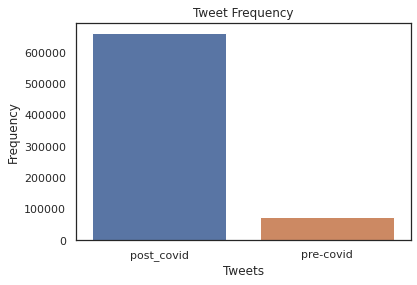

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.countplot(x="covid", data=df1)

plt.title("Tweet Frequency")
plt.xlabel("Tweets")
plt.ylabel("Frequency")

plt.show()

Here, we can see that tweets with #wfh (work from home) has increased significantly after covid, which also follows the trend.

In [24]:
df1['Word Count'] = df1['content'].apply(lambda x: len(str(x).split()))

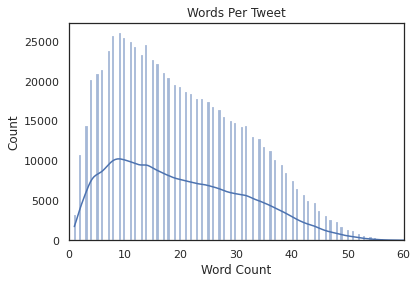

In [25]:
a = sns.histplot(data=df1, x="Word Count", kde=True)
a = a.set(xlim=(0,60))

plt.title("Words Per Tweet")

plt.show(a)

The most number of tweets are around 10 to 20 words.

## Removing stopwords

In [26]:
# from nltk.corpus import stopwords
# stop = set(stopwords.words('english'))

# df1['cleantext'] = df1['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

 I am going to use pipeline from huggingface, for which I dont have to remove stopwords to analyze the tweets sentiment.

In [27]:
df1.head()

,date,content,hashtags,covid,Word Count
0,2021-08-06,Powertec is here to help guide and advise you on recommended Wi Fi connectivity solution for student studying at home,"['workingfromhome', 'WFH', 'homeoffice', 'homeschooling', 'COVID', 'lockdown2021', 'studyfromhome', 'homeschooling']",post_covid,20
1,2021-08-06,keep it casual while working from home writes No thanks Formals,"['SidharthMalhotra', 'Casual', 'Bollywood', 'WFH']",post_covid,11
2,2021-08-06,Secretary team is sleeping in the job a usual,['wfh'],post_covid,9
3,2021-08-06,If you work from home it may be a good idea to establish a section of your home where you work and keep it separate from where you unwind if thats possible,['WFH'],post_covid,32
4,2021-08-06,Salesforce Apex Programming tutorial t,"['superbadge', 'JN', 'JornalNacional', 'salesforcejobs', 'salesforceconsultant', 'SalesforceCPQ', 'lookingfornewjob', 'COVID19', 'lostjob', 'wfh']",post_covid,5


In [28]:
df1 = df1.drop(columns=['covid', 'Word Count'])

## Saving dataframe to csv

In [29]:
df1.to_csv('cleanertweets.csv', index=False)